In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

# Enter path to the data_fusion_guest_lecture file
image_folder_path = "data" 

# Loads labels
df = pd.read_csv(os.path.join(image_folder_path, "seedling_labels.csv"))

# Creates path to top & side view
df["color_cam_path"] = image_folder_path + "/" + df["color_cam_path"]
df["side_cam_path"] = image_folder_path + "/" + df["side_cam_path"]

# Gives average expert label as a starting point
df["average_expert"] = (df["Expert 1"] + df["Expert 2"]  + df["Expert 3"] + df["Expert 4"]) / 4
print('Each row is an image pair of one color and one side view of one specific plant, together with the expert opinion (1,2 = normal, 3,4 = abnormal).')

df

Each row is an image pair of one color and one side view of one specific plant, together with the expert opinion (1,2 = normal, 3,4 = abnormal).


,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert
0,4,4,4,4,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,4.00
1,1,1,1,1,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,1.00
2,1,1,1,1,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,1.00
3,4,4,3,3,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50
4,3,1,1,1,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50
...,...,...,...,...,...,...,...,...,...
989,1,1,1,1,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,1.00
990,1,1,1,1,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,1.00
991,1,1,1,1,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,1.00
992,2,3,3,3,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75


## Convert (1,2 = normal, 3,4 = abnormal) because it will be binary classification

In [29]:
# 0 = normal
# 1 = abnormal

# Round so we can replace
df['average_expert'] = df['average_expert'].round(0)

df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert']] = df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert']].replace([1,2], 0)
df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert']] = df[['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'average_expert']].replace([3,4], 1)

df

,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert
0,1,1,1,1,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,1.0
1,0,0,0,0,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,0.0
2,0,0,0,0,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,0.0
3,1,1,1,1,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,1.0
4,1,0,0,0,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,0.0
...,...,...,...,...,...,...,...,...,...
989,0,0,0,0,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,0.0
990,0,0,0,0,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,0.0
991,0,0,0,0,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,0.0
992,0,1,1,1,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,1.0


# Select first plant just to show how the images look (just for our intuition)

In [30]:
print(df['color_cam_path'][0])
print(df['color_cam_path'][1])

data/A1/00387 Plant 0000 Plant 0000/18-02-2019 -- 12.31.11,054_Cam_06.png
data/A1/00388 Plant 0001 Plant 0001/18-02-2019 -- 12.31.29,713_Cam_06.png


A1/00387 Plant 0000 Plant 0000   COLOR CAM:


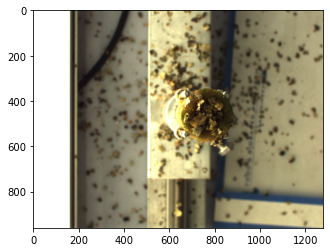

A1/00387 Plant 0000 Plant 0000   SIDE CAM:


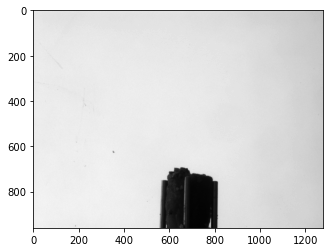

In [31]:
print('A1/00387 Plant 0000 Plant 0000   COLOR CAM:')
img0 = mpimg.imread(df['color_cam_path'][0])
imgplot0 = plt.imshow(img0)
plt.show()

print('A1/00387 Plant 0000 Plant 0000   SIDE CAM:')
img1 = mpimg.imread(df['side_cam_path'][0])
imgplot1 = plt.imshow(img1, cmap='gray')
plt.show()

### Do we need to extract features from the images?